In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime



# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ae7d63ed10>,
 'tobs': 65.0,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
rec_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
#print(session.query(measurement.date).filter(measurement.date >= '2016-08-23').order_by(measurement.date.desc()).all())
print(rec_date[0])

2017-08-23


2017-08-23


,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


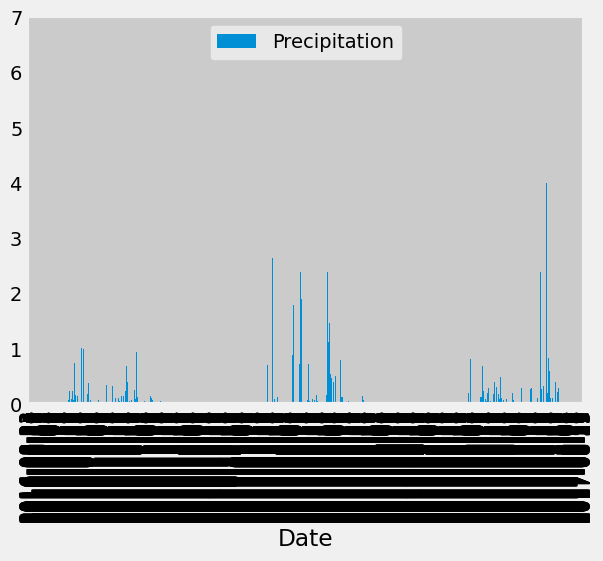

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

first_date = datetime.strptime(rec_date[0], "%Y-%m-%d").date()
print(first_date)
# Calculate the date one year from the last date in data set.
query_date = first_date - dt.timedelta(days=365)
# print(query_date)

# Perform a query to retrieve the data and precipitation scores
query_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
date_data = [i[0] for i in query_data]
measurement_data = [i[1] for i in query_data] 

prcp_df = pd.DataFrame({"Date": date_data, "Precipitation": measurement_data})
# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date", ascending=True)
prcp_df.set_index("Date",inplace=False)


prcp_df.plot(x = 'Date', y = 'Precipitation', kind='bar')



# Use Pandas Plotting with Matplotlib to plot the data
# prcp_df["Date"] = pd.to_datetime(prcp_df["Date"], format='%Y-%m-%d')
# date_list = prcp_df["Date"].dt.strftime('%Y-%m-%d')

#date_int = date_list.iloc[0]
#date_max = date_list.iloc[-1]
# print(date_min)

# new_date_list = [date_int]
# while date_int < date_max:
#     date_int = date_int + pd.timedelta(days=41)
#     new_date_list.append(date_int)

# print(new_date_list)  
##
# print(new_date_list)
# for i in range(date_list):
#     date_list[i]
    

# prcp_df.plot.bar()
# plt.tight_layout()
# plt.show()

# 
# date_list = prcp_df["Date"].unique()
# date_list["Date"]

# ax = prcp_df.plot(kind="bar", x="Date", y="Precipitation")

# current_ticks = ax.get_xticks()
# current_labels = ax.get_xticklabels()

# print(current_ticks)

prcp_df.head()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(prcp_df.describe())

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [29]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(measurement.station).count()
print(station_count)

19550


In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(active_station)
print(type(active_station))

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
<class 'list'>


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

values = [i[1] for i in active_station]
min_station = min(values)
max_station = max(values)
avg = sum(values)/len(values)

print(min_station)
print(max_station)
print(avg)

511
2772
2172.222222222222


<Axes: >

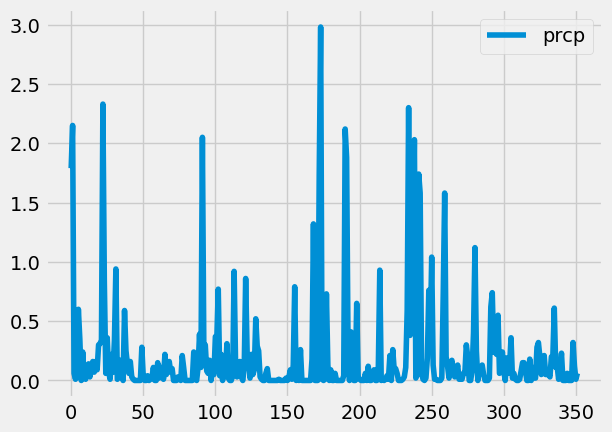

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_act_station = active_station[0][0]

df = pd.DataFrame(session.query(measurement.date, measurement.prcp).filter(measurement.station == most_act_station, measurement.date >= '2016-08-23'))

df.plot()

# Close Session

In [17]:
# Close Session
session.close()